In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
N = 15
S = 0
I = 1
R = 2
lattice = np.full((N, N), S)

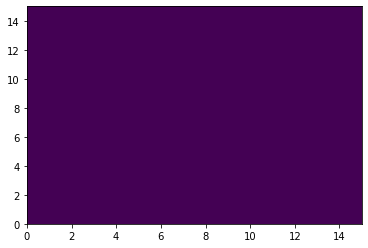

In [43]:
plt.pcolormesh(lattice)

In [44]:
I_sites = []
first_site = (N//2,N//2)
I_sites.append(first_site)
lattice[first_site[0]][first_site[1]] = I

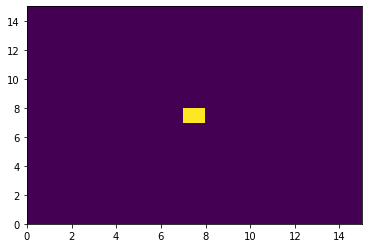

In [45]:
plt.pcolormesh(lattice)

In [46]:
c = 0.60

In [78]:
#define nearest neighbors - boundary conditions
def get_nearest_neighbours(curr_location, N):
    x = curr_location[0]
    y = curr_location[1]
    if x==0:
        first_neighbor = (N-1, y)
    else:
        first_neighbor = (x-1, y)
    if y == 0:
        second_negihbor = (N-1, x)
    else:
        second_negihbor = (x, y-1)
    if x == N-1:
        third_neighbor = (0, y)
    else:
        third_neighbor = (x+1, y)
    if y == N-1:
        fourth_neighbor = (x, 0) 
    else:
        fourth_neighbor = (x, y+1) 
    return [first_neighbor, second_negihbor, third_neighbor, fourth_neighbor]

In [79]:
I_sites[0]

(7, 7)

In [80]:
neighbours = get_nearest_neighbours(I_sites[0], 100)

In [81]:
print(neighbours)

[(6, 7), (7, 6), (8, 7), (7, 8)]


In [82]:
new_lattice = lattice

In [83]:
for neighbour in neighbours:
    new_lattice[neighbour[0]][neighbour[1]] = 1.0

In [84]:
new_lattice[30:50][30:50]

array([], shape=(0, 15), dtype=int32)

In [155]:
cs = np.linspace(0.15, 0.20, 50)

In [157]:
cs

array([0.15      , 0.15102041, 0.15204082, 0.15306122, 0.15408163,
       0.15510204, 0.15612245, 0.15714286, 0.15816327, 0.15918367,
       0.16020408, 0.16122449, 0.1622449 , 0.16326531, 0.16428571,
       0.16530612, 0.16632653, 0.16734694, 0.16836735, 0.16938776,
       0.17040816, 0.17142857, 0.17244898, 0.17346939, 0.1744898 ,
       0.1755102 , 0.17653061, 0.17755102, 0.17857143, 0.17959184,
       0.18061224, 0.18163265, 0.18265306, 0.18367347, 0.18469388,
       0.18571429, 0.18673469, 0.1877551 , 0.18877551, 0.18979592,
       0.19081633, 0.19183673, 0.19285714, 0.19387755, 0.19489796,
       0.19591837, 0.19693878, 0.19795918, 0.19897959, 0.2       ])

In [96]:
N = 15
S = 0
I = 1
R = 2
lattice = np.full((N, N), S)

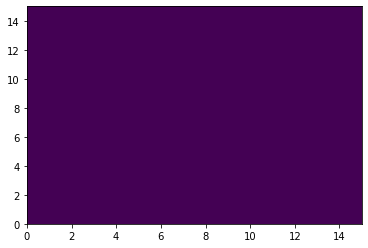

In [97]:
plt.pcolormesh(lattice)

In [98]:
I_sites = []
first_site = (N//2,N//2)
I_sites.append(first_site)
lattice[first_site[0]][first_site[1]] = I

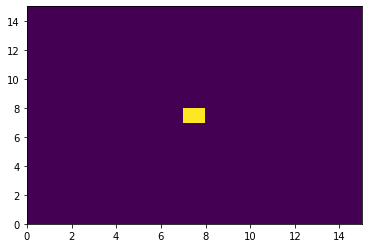

In [99]:
plt.pcolormesh(lattice)

In [238]:
N = 100
S = 0
I = 1
R = 2
def get_suspected_lattice(N, c):
    lattice = np.full((N, N), S)
    I_sites = []
    first_site = (N//2,N//2)
    I_sites.append(first_site)
    lattice[first_site[0]][first_site[1]] = I
    c = 0.001
    for i in range(int(1e7)):
        if len(I_sites)==0:
            first_site = (N//2,N//2)
            I_sites.append(first_site)
            idx = 0
        elif 0== len(I_sites)-1:
            idx = 0
        else:
            idx= np.random.randint(0, len(I_sites)-1)
        idxs = I_sites[idx]
        if np.random.random()<=c:
            lattice[idxs[0]][idxs[1]] = R
            del I_sites[idx]
        else:
            #define nearest negihvours
            neighbours = get_nearest_neighbours(I_sites[idx], N)
            neighbours_idx = np.random.randint(0,3)
            neighbour_idx = neighbours[neighbours_idx]
            neighbour = lattice[neighbour_idx[0]][neighbour_idx[1]]
            if neighbour == S:
                lattice[neighbour_idx[0]][neighbour_idx[1]] = I
                I_sites.append(neighbour_idx)
        ratio = get_suspected_ratio(lattice)
    
    return lattice
        
def get_suspected_ratio(lattice):
    S_sum = 0.0
    for row in lattice:
        S_sum += len(np.where(row==R)[0])
    return S_sum/  len(lattice)**2 
        

# lattice.shape

In [228]:
lattice = get_suspected_lattice(L, 0.8)

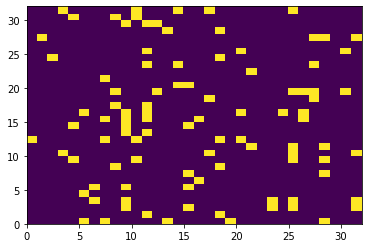

In [229]:
plt.pcolormesh(lattice)

In [237]:
get_suspected_ratio(lattice)

0.095703125

In [226]:
lattice

array([[1, 1, 2, ..., 1, 1, 1],
       [1, 1, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 2, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [206]:
40/16**2

0.15625

In [207]:
lattice

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [239]:
cs = np.linspace(0.15, 0.20, 5)
Ls = [32]
ratios_dict = {}
for L in Ls:
    ratios = []
    for c in cs:
        lattice = get_suspected_lattice(L, c)
        ratio = get_suspected_ratio(lattice)
        ratios.append(ratio)
    ratios_dict[L] = ratios   
        

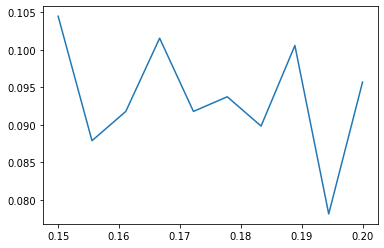

In [235]:
plt.plot(cs, ratios_dict[32])

In [219]:
ratios_dict[32]


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [211]:
from matplotlib import ticker, cm

In [212]:
# fig = plt.figure(figsize=(12,12))
# plt.pcolormesh(lattice)
# fig, ax = plt.subplots()
# cs = ax.contourf(lattice, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
# cbar = fig.colorbar(lattice)

In [213]:
lattice

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 0, 1]])

In [214]:
def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N) #wez rozklad jednostajny
                b = np.random.randint(0, N)
                s =  config[a, b]
                nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
                cost = 2*s*nb #-s*nb
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a, b] = s
    return config


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np


data = np.random.rand(10, 10) * 20

# create discrete colormap
cmap = colors.ListedColormap(['red', 'blue'])
bounds = [0,10,20]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
ax.set_xticks(np.arange(-.5, 10, 1));
ax.set_yticks(np.arange(-.5, 10, 1));

plt.show()

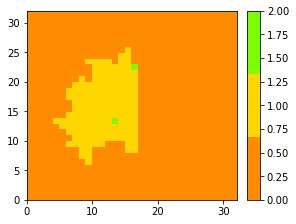

In [164]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# fig = plt.figure(figsize=(12,6))
colormaps = [ListedColormap(["darkorange", "gold", "lawngreen"])]
n = len(colormaps)
fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(lattice, cmap=cmap, rasterized=True, vmin=0, vmax=2)
        fig.colorbar(psm, ax=ax)
plt.show()
# psm = ax.pcolormesh(lattice, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
# fig.colorbar(psm, ax=ax)

In [138]:
lattice

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])